In [1]:
#!pip install keras
#!pip install tensorflow-gpu

In [2]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import lstm, time #helper libraries


In [3]:
#Step 1 Load Data
X_train, y_train, X_test, y_test = lstm.load_data('sp500.csv', 50, True)

In [8]:
#Step 2 Build Model
model = Sequential()

model.add(LSTM(
    50,
    return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(
    100,
    return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(
    1))
model.add(Activation('linear'))

start = time.time()
model.compile(loss='mse', optimizer='rmsprop')
print('compilation time : ', time.time() - start)

compilation time :  0.029908418655395508


In [11]:
#Step 3 Train the model
model.fit(
    X_train,
    y_train,
    batch_size=512,
    epochs=100,
    validation_split=0.05)

Epoch 1/100
7/7 [==============================] - 0s 12ms/step - loss: 8.1052e-04 - val_loss: 5.6411e-04
Epoch 2/100
7/7 [==============================] - 0s 12ms/step - loss: 6.9251e-04 - val_loss: 6.7837e-04
Epoch 3/100
7/7 [==============================] - 0s 12ms/step - loss: 6.8459e-04 - val_loss: 4.1839e-04
Epoch 4/100
7/7 [==============================] - 0s 12ms/step - loss: 5.7169e-04 - val_loss: 4.9738e-04
Epoch 5/100
7/7 [==============================] - 0s 12ms/step - loss: 6.0127e-04 - val_loss: 5.2697e-04
Epoch 6/100
7/7 [==============================] - 0s 12ms/step - loss: 5.2348e-04 - val_loss: 4.1529e-04
Epoch 7/100
7/7 [==============================] - 0s 12ms/step - loss: 4.8842e-04 - val_loss: 4.2236e-04
Epoch 8/100
7/7 [==============================] - 0s 12ms/step - loss: 4.7354e-04 - val_loss: 4.4659e-04
Epoch 9/100
7/7 [==============================] - 0s 12ms/step - loss: 4.7566e-04 - val_loss: 3.7381e-04
Epoch 10/100
7/7 [============================

7/7 [==============================] - 0s 12ms/step - loss: 2.3297e-04 - val_loss: 1.3259e-04
Epoch 78/100
7/7 [==============================] - 0s 12ms/step - loss: 1.9478e-04 - val_loss: 1.3894e-04
Epoch 79/100
7/7 [==============================] - 0s 11ms/step - loss: 2.4410e-04 - val_loss: 1.3123e-04
Epoch 80/100
7/7 [==============================] - 0s 11ms/step - loss: 2.0604e-04 - val_loss: 1.7041e-04
Epoch 81/100
7/7 [==============================] - 0s 11ms/step - loss: 2.2697e-04 - val_loss: 1.2784e-04
Epoch 82/100
7/7 [==============================] - 0s 12ms/step - loss: 2.0094e-04 - val_loss: 2.4922e-04
Epoch 83/100
7/7 [==============================] - 0s 12ms/step - loss: 2.2634e-04 - val_loss: 1.3870e-04
Epoch 84/100
7/7 [==============================] - 0s 11ms/step - loss: 2.0194e-04 - val_loss: 2.4059e-04
Epoch 85/100
7/7 [==============================] - 0s 12ms/step - loss: 2.3005e-04 - val_loss: 1.2696e-04
Epoch 86/100
7/7 [==============================] 

yo


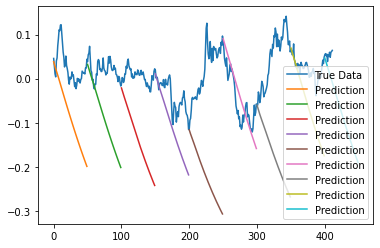

In [12]:
#Step 4 - Plot the predictions!
predictions = lstm.predict_sequences_multiple(model, X_test, 50, 50)
lstm.plot_results_multiple(predictions, y_test, 50)